   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000



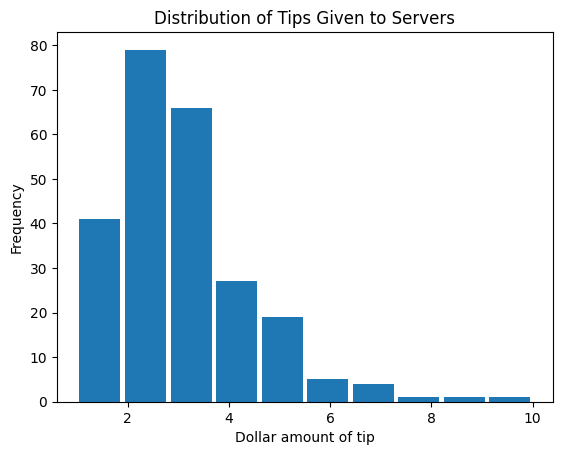

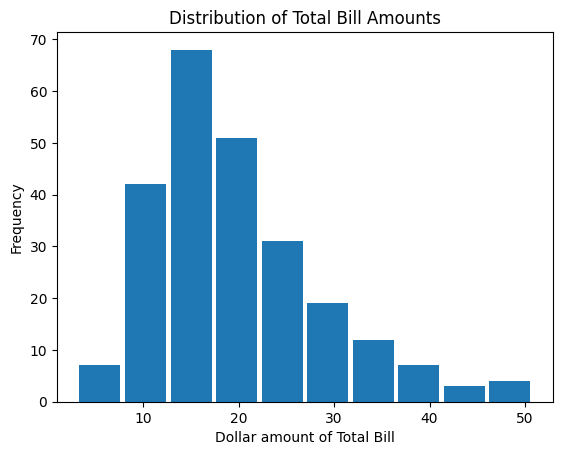

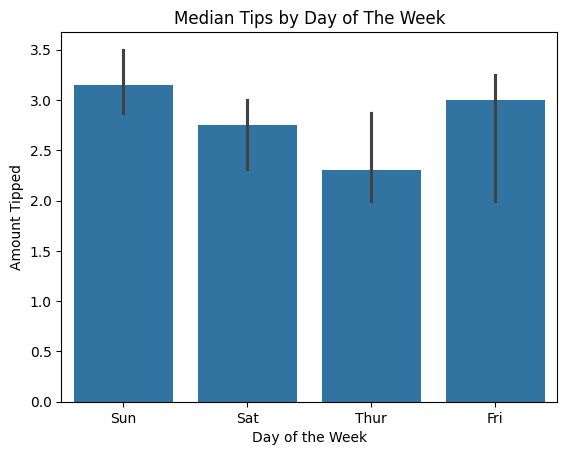

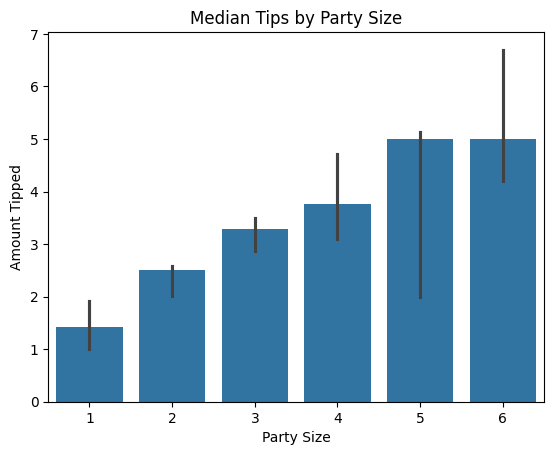

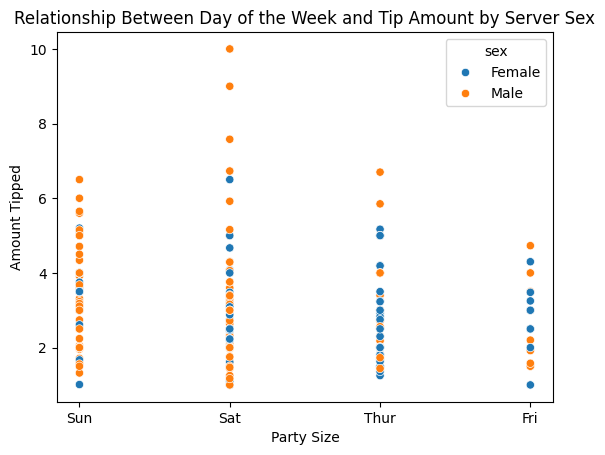

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from numpy import median

tips = pd.read_csv("/content/tips.csv")
print(tips.head())
print()

#descriptive statistics
print(tips.describe())
print()

#histogram showing the distribution of tips
plt.hist(tips['tip'], bins = 10, rwidth=.9)
plt.title('Distribution of Tips Given to Servers')
plt.ylabel('Frequency')
plt.xlabel('Dollar amount of tip')
plt.show()
print()

#bar plot showing the relationship between day of the week and tip amount
p = sns.barplot(data = tips, x= 'day', y= 'tip', estimator = median)
p.set(title= 'Median Tips by Day of The Week')
p.set(xlabel= 'Day of the Week')
p.set(ylabel= 'Amount Tipped')
plt.show()
print()

#bar plot showing the relationship between party size and tip amount
p = sns.barplot(data = tips, x= 'size', y= 'tip', estimator = median)
p.set(title= 'Median Tips by Party Size')
p.set(xlabel= 'Party Size')
p.set(ylabel= 'Amount Tipped')
plt.show()
print()

#scatterplot showing party size and tip amount, colored by the sex of the server
p = sns.scatterplot(data = tips, x= 'day', y= 'tip', hue= 'sex')
p.set(title= 'Relationship Between Day of the Week and Tip Amount by Server Sex')
p.set(xlabel= 'Party Size')
p.set(ylabel= 'Amount Tipped')
plt.show()
print()


From the desciptive statistics:

*   The mean amount tipped is 2.998279
*   The range of tips is 1-10
*   The average party size is 2.569672

From the above histogram:

*   The distribution of tips is right skewed, this means that the mean tip amount will be higher than the median tip amount.

From the Day of the Week bar plot:

*   Thursday has the lowest median tip amount
*   Friday and Sunday have the highest median tip amount

From the Party Size bar plot:

*   Tips appear to be positivley correlated with party size
*   There is little increase in tip amount between a party of 5 and 6

From the above scatterplot:

*   Male servers have the highest tip amounts for each day of the week
*   The highest tip for a male server is higher than the highest tip for a female server, though both were on Saturday  



In [ ]:
#forecasting (regression) model that only includes significant preditors of tip amount
model = smf.ols(formula= 'tip ~ total_bill', data = tips).fit()
print (model.summary())



                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           6.69e-34
Time:                        06:02:51   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

I used the p-value of the overall model (prob (F-statistic)) to determine that the overall model is significant (as is it below 0.05). Then I used the individual p values (P>|t|) to determine if each independant variable was signigant, of which only total_bill was signifigant. The relationship for total bill is a positive relationship, which means that as total_bill increases (by 1 dollar) the tip amount will increase (by a forecasted 0.1050 dollars).

In [ ]:
#forecast the tip amount given total_bill = 30.99
#save the coefficients to variables
print (model.params)
print()
intercept = model.params[0]
total_coef = model.params [1]

#save the test values to variables
total_x = 30.99

#generate a regression equation
forecasted_tip = total_coef * total_x + intercept

#print the forecast
print('The forecasted tip based on given test values:')
print(f'${forecasted_tip:,.2f}')



Intercept     0.920270
total_bill    0.105025
dtype: float64

The forecasted tip based on given test values:
$4.17


**Summary:**
---
I found that tip amounts can be forecasted and explained by the amount of the total bill because it is a signifigant independant variable (for this data). I also found that sex, smoker status, day of service, time of service, and party size are insignificant variables and cannot be relied upon to predict the tip amount.